In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [220]:
Data_Raw = pd.read_csv("vgsales.csv")
Data_Raw

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [221]:
Data_Raw.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

## Name

In [222]:
x = Data_Raw["Name"].value_counts()
x

Name
Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: count, Length: 11493, dtype: int64

In [223]:
for i in Data_Raw["Name"]:
    if "??"in i:
        print(i)

Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana Boku no Dai Sougen??PS3
B's-LOG Party??PSP
Gochuumon wa Usagi Desu ka?? Wonderful Party!


In [224]:
display(Data_Raw[Data_Raw['Name']=="B's-LOG Party??PSP"])
display(Data_Raw[Data_Raw['Name']=="Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana Boku no Dai Sougen??PS3"])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13538,13540,B's-LOG Party??PSP,2010,Adventure,Idea Factory,0,0.0,0.04,0.0,0.04,NaN


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,2007,Adventure,Sony Computer Entertainment,0,0.0,0.08,0.0,0.08,NaN


In [225]:
Data_Raw['Name'].replace({"B's-LOG Party??PSP":"B's-LOG Party"},inplace=True)
Data_Raw['Name'].replace({"Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana Boku no Dai Sougen??PS3":"Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana Boku no Dai Sougen"},inplace=True)

In [226]:
Data_Raw.loc[13538,"Global_Sales"] = Data_Raw.loc[13538,"Other_Sales"]
Data_Raw.loc[13538,"Other_Sales"] = Data_Raw.loc[13538,"JP_Sales"]
Data_Raw.loc[13538,"JP_Sales"] = Data_Raw.loc[13538,"EU_Sales"]
Data_Raw.loc[13538,"EU_Sales"] = Data_Raw.loc[13538,"NA_Sales"]
Data_Raw.loc[13538,"NA_Sales"] = Data_Raw.loc[13538,"Publisher"]
Data_Raw.loc[13538,"Publisher"] = Data_Raw.loc[13538,"Genre"]
Data_Raw.loc[13538,"Genre"] = Data_Raw.loc[13538,"Year"]
Data_Raw.loc[13538,"Year"] = Data_Raw.loc[13538,"Platform"]

C:\Users\usera\AppData\Local\Temp\ipykernel_10372\2205581756.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Data_Raw.loc[13538,"NA_Sales"] = Data_Raw.loc[13538,"Publisher"]


In [227]:
Data_Raw.loc[11593,"Global_Sales"] = Data_Raw.loc[11593,"Other_Sales"]
Data_Raw.loc[11593,"Other_Sales"] = Data_Raw.loc[11593,"JP_Sales"]
Data_Raw.loc[11593,"JP_Sales"] = Data_Raw.loc[11593,"EU_Sales"]
Data_Raw.loc[11593,"EU_Sales"] = Data_Raw.loc[11593,"NA_Sales"]
Data_Raw.loc[11593,"NA_Sales"] = Data_Raw.loc[11593,"Publisher"]
Data_Raw.loc[11593,"Publisher"] = Data_Raw.loc[13538,"Genre"]
Data_Raw.loc[11593,"Genre"] = Data_Raw.loc[11593,"Year"]
Data_Raw.loc[11593,"Year"] = Data_Raw.loc[11593,"Platform"]

In [229]:
Data_Raw["Platform"].replace({'2600':'Atari','2007':'PS3','2010':'PSP'},inplace=True)
x = Data_Raw["Platform"].value_counts()
x.index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', 'Atari',
       'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG',
       'PCFX'],
      dtype='object', name='Platform')

In [230]:
display(Data_Raw[Data_Raw['Name']=="B's-LOG Party"])
display(Data_Raw[Data_Raw['Name']=="Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana Boku no Dai Sougen"])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13538,13540,B's-LOG Party,PSP,2010,Adventure,Idea Factory,0,0.0,0.04,0.0,0.04


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11593,11595,Boku no Natsuyasumi 3: Hokkoku Hen: Chiisana B...,PS3,2007,Adventure,Adventure,0,0.0,0.08,0.0,0.08


In [231]:
Data_Raw['Year'].fillna("Unknown",inplace=True)
Data_Raw['Publisher'].fillna("Unknown",inplace=True)

In [232]:
Data_Cleaning = Data_Raw
Data_Cleaning

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.0,0.01,0.00,0.00,0.01


In [355]:
# Data_Cleaning[Data_Cleaning["Platform"]=='PS V'....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


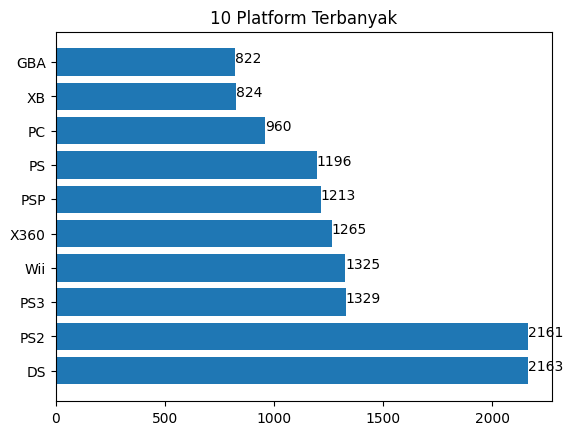

In [341]:
x = Data_Cleaning['Platform'].value_counts().head(10)
plt.barh(x.index, x.values)
for i,value in enumerate(x):
    plt.text(value,i,str(value))
plt.title("10 Platform Terbanyak")
plt.savefig('1')
plt.show()

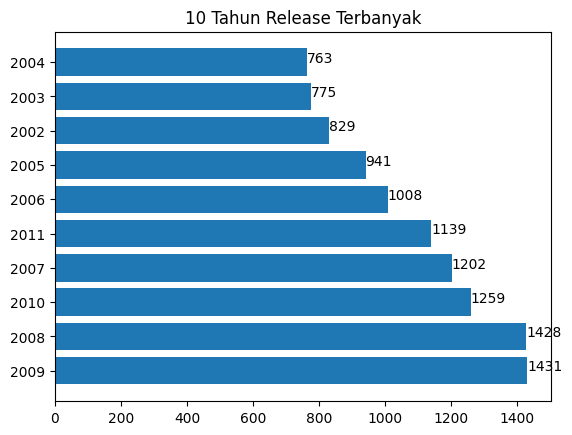

In [350]:
x = Data_Cleaning['Year'].value_counts().head(10)
plt.barh(x.index, x.values)
for i,value in enumerate(x):
    plt.text(value,i,str(value))
plt.title("10 Tahun Release Terbanyak")
plt.savefig('2')
plt.show()

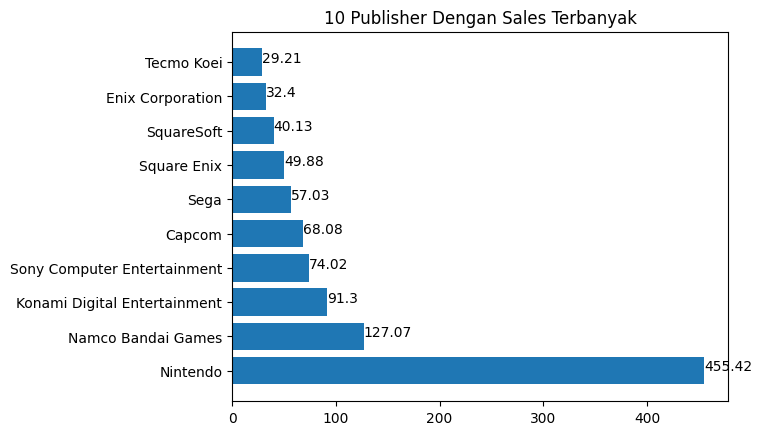

In [344]:
x = Data_Cleaning.groupby("Publisher")['JP_Sales'].sum().round(2).sort_values(ascending=False).head(10)
plt.barh(x.index, x.values)
for i,value in enumerate(x):
    plt.text(value,i,str(value))
plt.title("10 Publisher Dengan Sales Terbanyak")
plt.savefig('4')
plt.show()

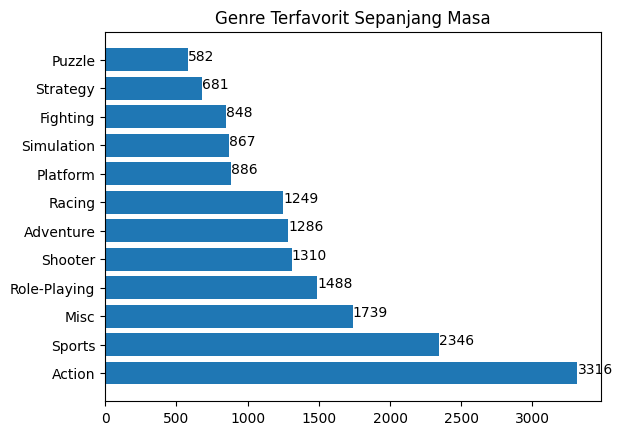

In [345]:
x = Data_Cleaning['Genre'].value_counts()
plt.barh(x.index, x.values)
for i,value in enumerate(x):
    plt.text(value,i,str(value))
plt.title("Genre Terfavorit Sepanjang Masa")
plt.savefig('5')
plt.show()

In [335]:
Data_Cleaning[Data_Cleaning['Year'].isin(['2018', '2019', '2020','2021','2022'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [354]:
Data_Cleaning[Data_Cleaning['Year'].isin(['2008', '2009', '2010','2011','2012'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
...,...,...,...,...,...,...,...,...,...,...,...
16587,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


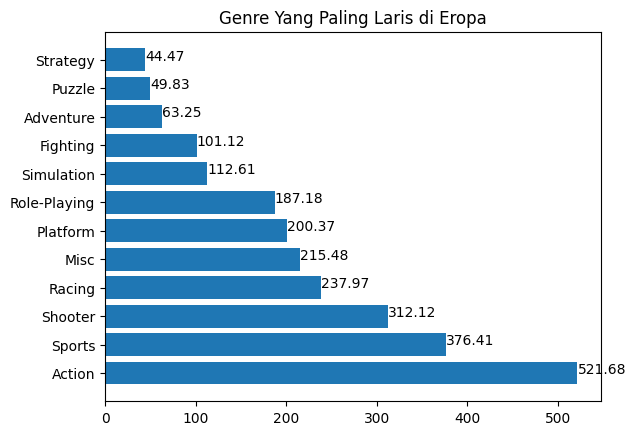

In [346]:
x = Data_Cleaning.groupby("Genre")['EU_Sales'].sum().round(2).sort_values(ascending=False)
plt.barh(x.index, x.values)
for i,value in enumerate(x):
    plt.text(value,i,str(value))
plt.title("Genre Yang Paling Laris di Eropa")
plt.savefig('6')
plt.show()

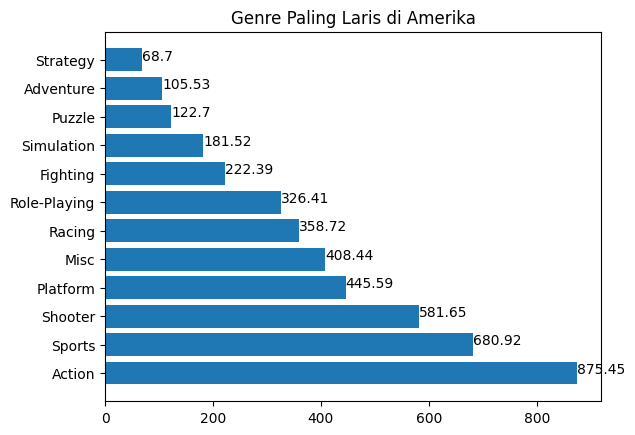

In [349]:
Data_Cleaning['NA_Sales'] = pd.to_numeric(Data_Cleaning['NA_Sales'],errors='coerce')
x = Data_Cleaning.groupby("Genre")['NA_Sales'].sum().round(2).sort_values(ascending=False)
plt.barh(x.index, x.values)
for i,value in enumerate(x):
    plt.text(value,i,str(value))
plt.title("Genre Paling Laris di Amerika")
plt.savefig('7')
plt.show()

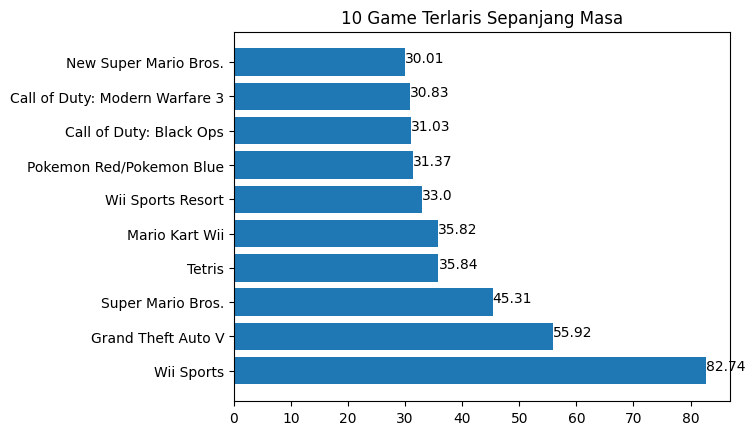

In [353]:
x = Data_Cleaning.groupby("Name")['Global_Sales'].sum().round(2).sort_values(ascending=False).head(10)
plt.barh(x.index, x.values)
for i,value in enumerate(x):
    plt.text(value,i,str(value))
plt.title("10 Game Terlaris Sepanjang Masa")
plt.savefig('8')
plt.show()

In [352]:
Data_Cleaning

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
